**CMSE 201 (Sec. 001) Final Project: The Effect of Political Polarization on State Responses to the COVID-19 Pandemic**
    

**Joel Miller**

**Question**
“Does having a government trifecta in a particular state make that state any more or less likely to implement mask mandates; and does the type of trifecta make a difference?”

**Background and Motivation**

This problem is something that is undoubtedly relevent to people in the United States, as we have seen partisan politics divide us as a result of events that would have historically drawn us together to work for a common goal. The COVID-19 Pandemic has led many American communities—on the state and local levels—to put in place mask mandates, which require people to wear masks in public places to prevent people who may unknowingly be infected from infecting those around them. A useful tactic for the political right has been to bolster their libretarian facade by pushing the idea that mask mandates are a blatant restriction of individual liberties. There is no doubt that this division has threatened discourse, but whether or not it has truly manifested in legislative policy or executive action has yet to be seen. The intention of this study is to see whether or not control over the two elected branches of state government correlates with a change in mask mandate prevelance. It is hypothesized that when a state government has in place a Republican trifecta (controlling power over the state house, state senate and gubinitorial office), that state is less likely to have in place mask mandates than both a divided government and a Democratic trifecta. A Democratic trifecta is expected to be more likely to implement mask mandate policies than either Republican trifectas or divided governments.

**Methodology**

Independent Variable: Trifecta Status (Whether there is a Democratic trifecta, Republican trifecta, or a divided government) in a particular state

Dependent Variable: Whether or not there is a mask mandate in palce in a particular county on a particular day


Working with large datasets that have different methods of organization requires significant reconfiguration of Pandas dataframes before they can be used effectively. The fact that one dataset uses state abreviations and the other uses full state names adds another level of complexity.

First, the mask mandate data from the CDC is imported and reconfigured. The large dataset was split up into a different dataset for each state. Each dataset contains a row for every day in every county in that state between April 10, 2020 and January 10, 2021. Column 5 of each dataset is looped through to check whether there is a mask mandate or not. This is then used to calculate a proportion of county-days during which that particualr state has a mask mandate.

Second, the trifecta status data from Ballotpedia is imported and reconfigured. This data is split into three lists, one for each trifecta status. Each list of state names is converted into abreviations using the FIPS and postal code dataframe.

With both datasets properly configured, the proportions are matched up with the proper states, and data analysis is run to discover a potential difference in means.

**Imports**

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
from scipy import stats

In [382]:
# read in the CDC Mask Mandate Dataset
mandates = pd.read_csv("U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_January_10__2021_by_County_by_Day.csv", skiprows=0)

**Prepping Mask Mandate Data**

In [381]:
mandate_state = mandates.iloc[:,0] # Column zero has state postal codes
unique_state = pd.unique(mandate_state) # unique function to take only unique states (not repeat)

In [372]:
percentage_list = []

val = 0
for state in unique_state: # for each unique state
    
    mask = mandate_state == state # where the state is equal to the unique state in question...
    state_df = mandates[mask] # create a df that only contains the data from that unique state
    ismandate_state = state_df.iloc[:,5] # might not need this
    
    yes_mandate = []
    no_mandate = []
    
    for countyday in ismandate_state: # for each row in the unique state df
        if countyday == "No Public Mask Mandate":
            no_mandate.append(1)
        elif countyday == "Public Mask Mandate":
            yes_mandate.append(1)
    percentage = len(yes_mandate) / (len(yes_mandate) + len(no_mandate))
    percentage_list.append(percentage)

In [373]:
# MAKE A NEW DATAFRAME THAT HAS ABREVIATED STATE NAMES AND PERCENTAGES COUNTYDAYS
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
# learned how to make a dataframe from scratch
my_data = {'col1': unique_state, 'col2': percentage_list}
my_dataframe = pd.DataFrame(data = my_data)

**Prepping Trifecta Data**

In [374]:
# READING IN ESSENTIAL CSV FILES
trifectas = pd.read_csv("Trifecta_Status.csv")
# https://ballotpedia.org/State_government_trifectas
fips = pd.read_csv("FIPS_Postal.csv")
# need to use FIPS or postal code to deal with full name versus abreviation between datasets
# https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696

In [375]:
# ORGANIZE STATES INTO SEPERATE LISTS CONTAINING EITHER DEM OR REP TRIFECTAS OR DIVIDED
trifecta_status = trifectas.iloc[:,1] # column containing trifecta status of a state
trifecta_state = trifectas.iloc[:,0] # state name for reference
rep_list = [] # initialize lists to store state names later
dem_list = []
div_list = []
val = 0
for status in trifecta_status: # loop through the trifecta statuses
    if status == "Republican trifecta": # depending on what status they are, seperate them into three different lists
        rep_list.append(trifecta_state[val])
    elif status == "Democratic trifecta":
        dem_list.append(trifecta_state[val])
    elif status == "Divided government":
        div_list.append(trifecta_state[val])  
    val+=1

In [376]:
# CONVERT STATE NAMES TO ABREVIATIONS
abr = fips.iloc[:,1] # the first column has the abreviated state names
state_name = fips.iloc[:,0] # the zeroth column has the full state names
rep_abr = [] # define lists for abreviations to replace the non-abreviated lists
dem_abr = []
div_abr = []

val = 0
for full_name in state_name: # loops through every full state name in the fips dataset
    for rep_state in rep_list: # loops through the full state names in the sorted rep dataset
        if rep_state == full_name: # if they are the same:
            rep_abr.append(abr[val]) # add the abreviated version to the new rep abreviated list
    val+=1


val = 0
for full_name in state_name: # repeat for other two sorted datasets
    for dem_state in dem_list:
        if dem_state == full_name:
            dem_abr.append(abr[val])
    val+=1

val = 0
for full_name in state_name:
    for div_state in div_list:
        if div_state == full_name:
            div_abr.append(abr[val])
    val+=1

**Putting it All Together**

In [377]:
# PUTTING THE TWO DATASETS TOGETHER
state_percents_state = my_dataframe.iloc[:,0] # state names from my dataset
state_percents = my_dataframe.iloc[:,1] # percentages

rep_abr_final = []
dem_abr_final = []
div_abr_final = []

rep_percentage = []
dem_percentage = []
div_percentage = []

val = 0
for trifecta_state in rep_abr: # for the republican trifecta states
    for my_state in state_percents_state: # for every state in my dataset
        if trifecta_state == my_state: # when my dataset state name equals the trifecta dataset state name:
            rep_abr_final.append(trifecta_state) # add the name to a list
            rep_percentage.append(state_percents[state_percents_state == my_state]) # add the percent to a list         
    val += 1
    
val = 0
for trifecta_state in dem_abr: # repeat for other two categories
    for my_state in state_percents_state:
        if trifecta_state == my_state:
            dem_abr_final.append(trifecta_state)
            dem_percentage.append(state_percents[state_percents_state == my_state])   
    val += 1
    
val = 0
for trifecta_state in div_abr:
    for my_state in state_percents_state:
        if trifecta_state == my_state:
            div_abr_final.append(trifecta_state)
            div_percentage.append(state_percents[state_percents_state == my_state])         
    val += 1

**Results**

In [378]:
# VISUALIZATION AND DATA ANALYTICS
# Means and Standard Deviations of Each Subgroup
rep_array = np.array(rep_percentage) # make them arrays so we can do math on them
dem_array = np.array(dem_percentage)
div_array = np.array(div_percentage)
rep_mean = rep_array.mean() # take means of arrays
dem_mean = dem_array.mean()
div_mean = div_array.mean()
rep_std = rep_array.std() # take standard deviation of arrays
div_std = div_array.std()
dem_std = dem_array.std()
print("republican trifectas mean: ", rep_mean, "standard deviation: ", rep_std)
print("divided governments mean: ", div_mean, "standard deviation: ", div_std)
print("democratic trifectas mean: ", dem_mean, "standard deviation: ", dem_std)

republican trifectas mean:  0.26524918319665003 standard deviation:  0.2840537681907777
divided governments mean:  0.6935386473429951 standard deviation:  0.25226282136903416
democratic trifectas mean:  0.8556653491436099 standard deviation:  0.11291540276345725


The Democratic trifectas having a higher mean indicates that, on average, they are more likely to have widespread mask mandates in place than the other groups.

[(0.0, 1.0)]

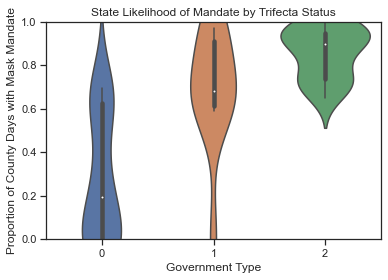

In [379]:
# HISTOGRAMS
my_plot2 = sns.violinplot(data = (rep_array, div_array, dem_array)) # plot each array
my_plot2.set(xlabel = "Government Type", ylabel = "Proportion of County Days with Mask Mandate") # labels
my_plot2.set(title = "State Likelihood of Mandate by Trifecta Status") # title
my_plot2.set(ylim=(0,1)) # only from 0% to 100%
# https://www.codegrepper.com/code-examples/python/seaborn+rename+labels

This violin plot is helpful in understanding the difference in mask mandate prevelance between government types (from left to right: Republican trifecta, divided government, Democratic trifecta). The correct way to interperet the probability on the y-axis is that if you pick a random day (April 10, 2020–January 10, 2021) in a random county in that state, it is the probability that there would be a mask mandate in place.

Text(0.5, 1.0, 'State Likelihood of Mandate')

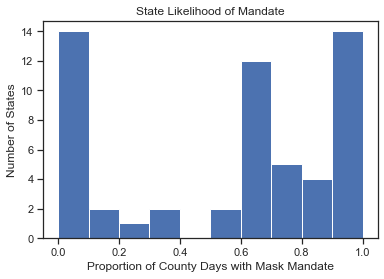

In [380]:
plt.hist(percentage_list) # plot all of the states in one histogram
plt.xlabel("Proportion of County Days with Mask Mandate")
plt.ylabel("Number of States")
plt.title("State Likelihood of Mandate")

**Synthesis and Discussion**

I learned that trifecta status is an accurate predictor of mask mandate prevelance within states. There is a very large difference in the likelihood of having mask mandates in states with Democratic trifectas and states with Republican trifectas (~59% difference).

Some obstacles that I ran into were the datasets being in very different formats. It wasn't as simple as comparing one column to another. It was also necessary to convert full state names to abreviations, which was a bit of a chore, but easily overcome.

Next time, I would dig a little deeper and try to determine if a political party having control over the legislature or the governor's office is more determinant. It would also be interesting to see how this correlation has changed with time.

Having a government trifecta does correlate with a change in mask mandate prevelance between states. States with Republican trifectas are less likely than divided goverments to implement mask mandates, and states with Democratic trifectas are much more likely to implement mask mandates than divided governments.

**References**

pandas.DataFrame. pandas.DataFrame - pandas 1.2.4 documentation. (n.d.). https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html. 

Publisher Environmental Public Health Tracking. (2021, April 17). U.S. State and Territorial Public Mask Mandates From April 10, 2020 through March 22, 2021 by County by Day. U.S. State and Territorial Public Mask Mandates From April 10, 2020 through March 22, 2021 by County by Day - CKAN. https://catalog.data.gov/dataset/u-s-state-and-territorial-public-mask-mandates-from-april-10-2020-through-january-10-2021-. 

Natural Resources Conservation Service. State FIPS Codes. (n.d.). https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696. 

seaborn rename labels Code Example. (n.d.). https://www.codegrepper.com/code-examples/python/seaborn+rename+labels. 

State government trifectas. Ballotpedia. (n.d.). https://ballotpedia.org/State_government_trifectas. 